In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import linalg as la
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from itertools import chain, combinations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import warnings
from imageio import imread
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

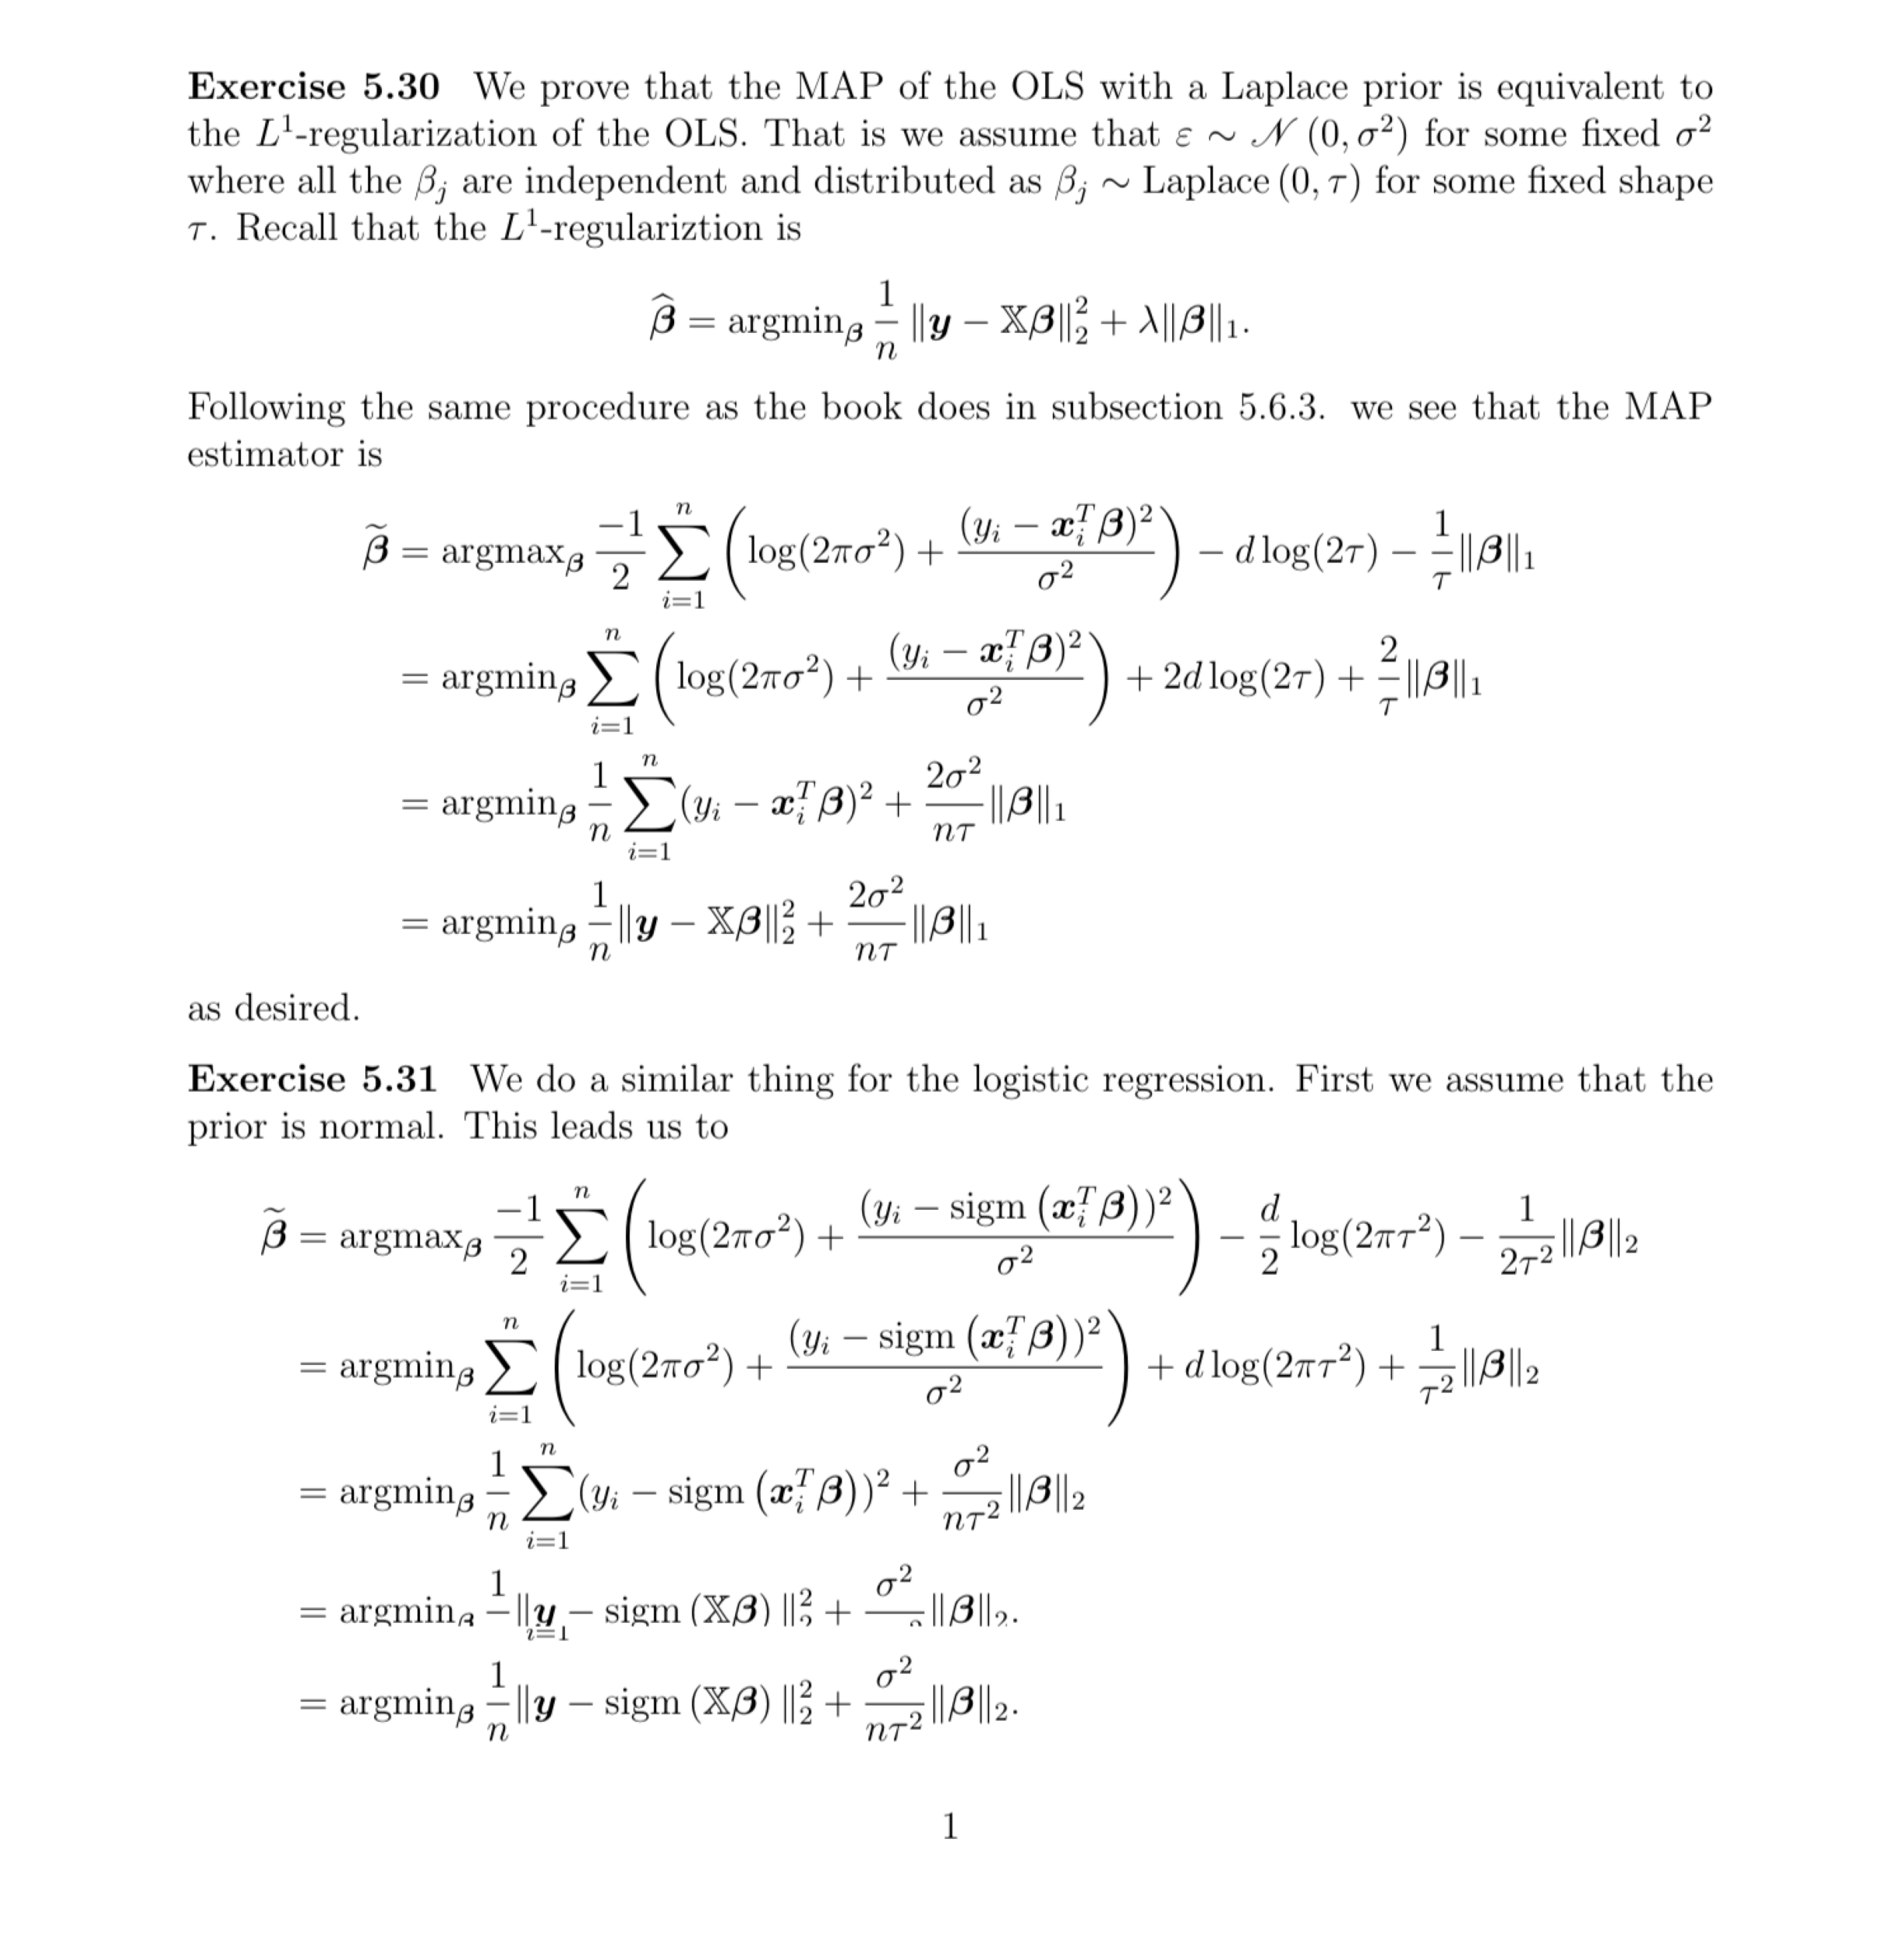

In [2]:
prob_30 = imread("5_30.png")
fig = plt.figure(figsize=(15,8))
fig.set_dpi(400)
ax = fig.add_subplot()
ax.imshow(prob_30)
ax.axis('off')
plt.show()

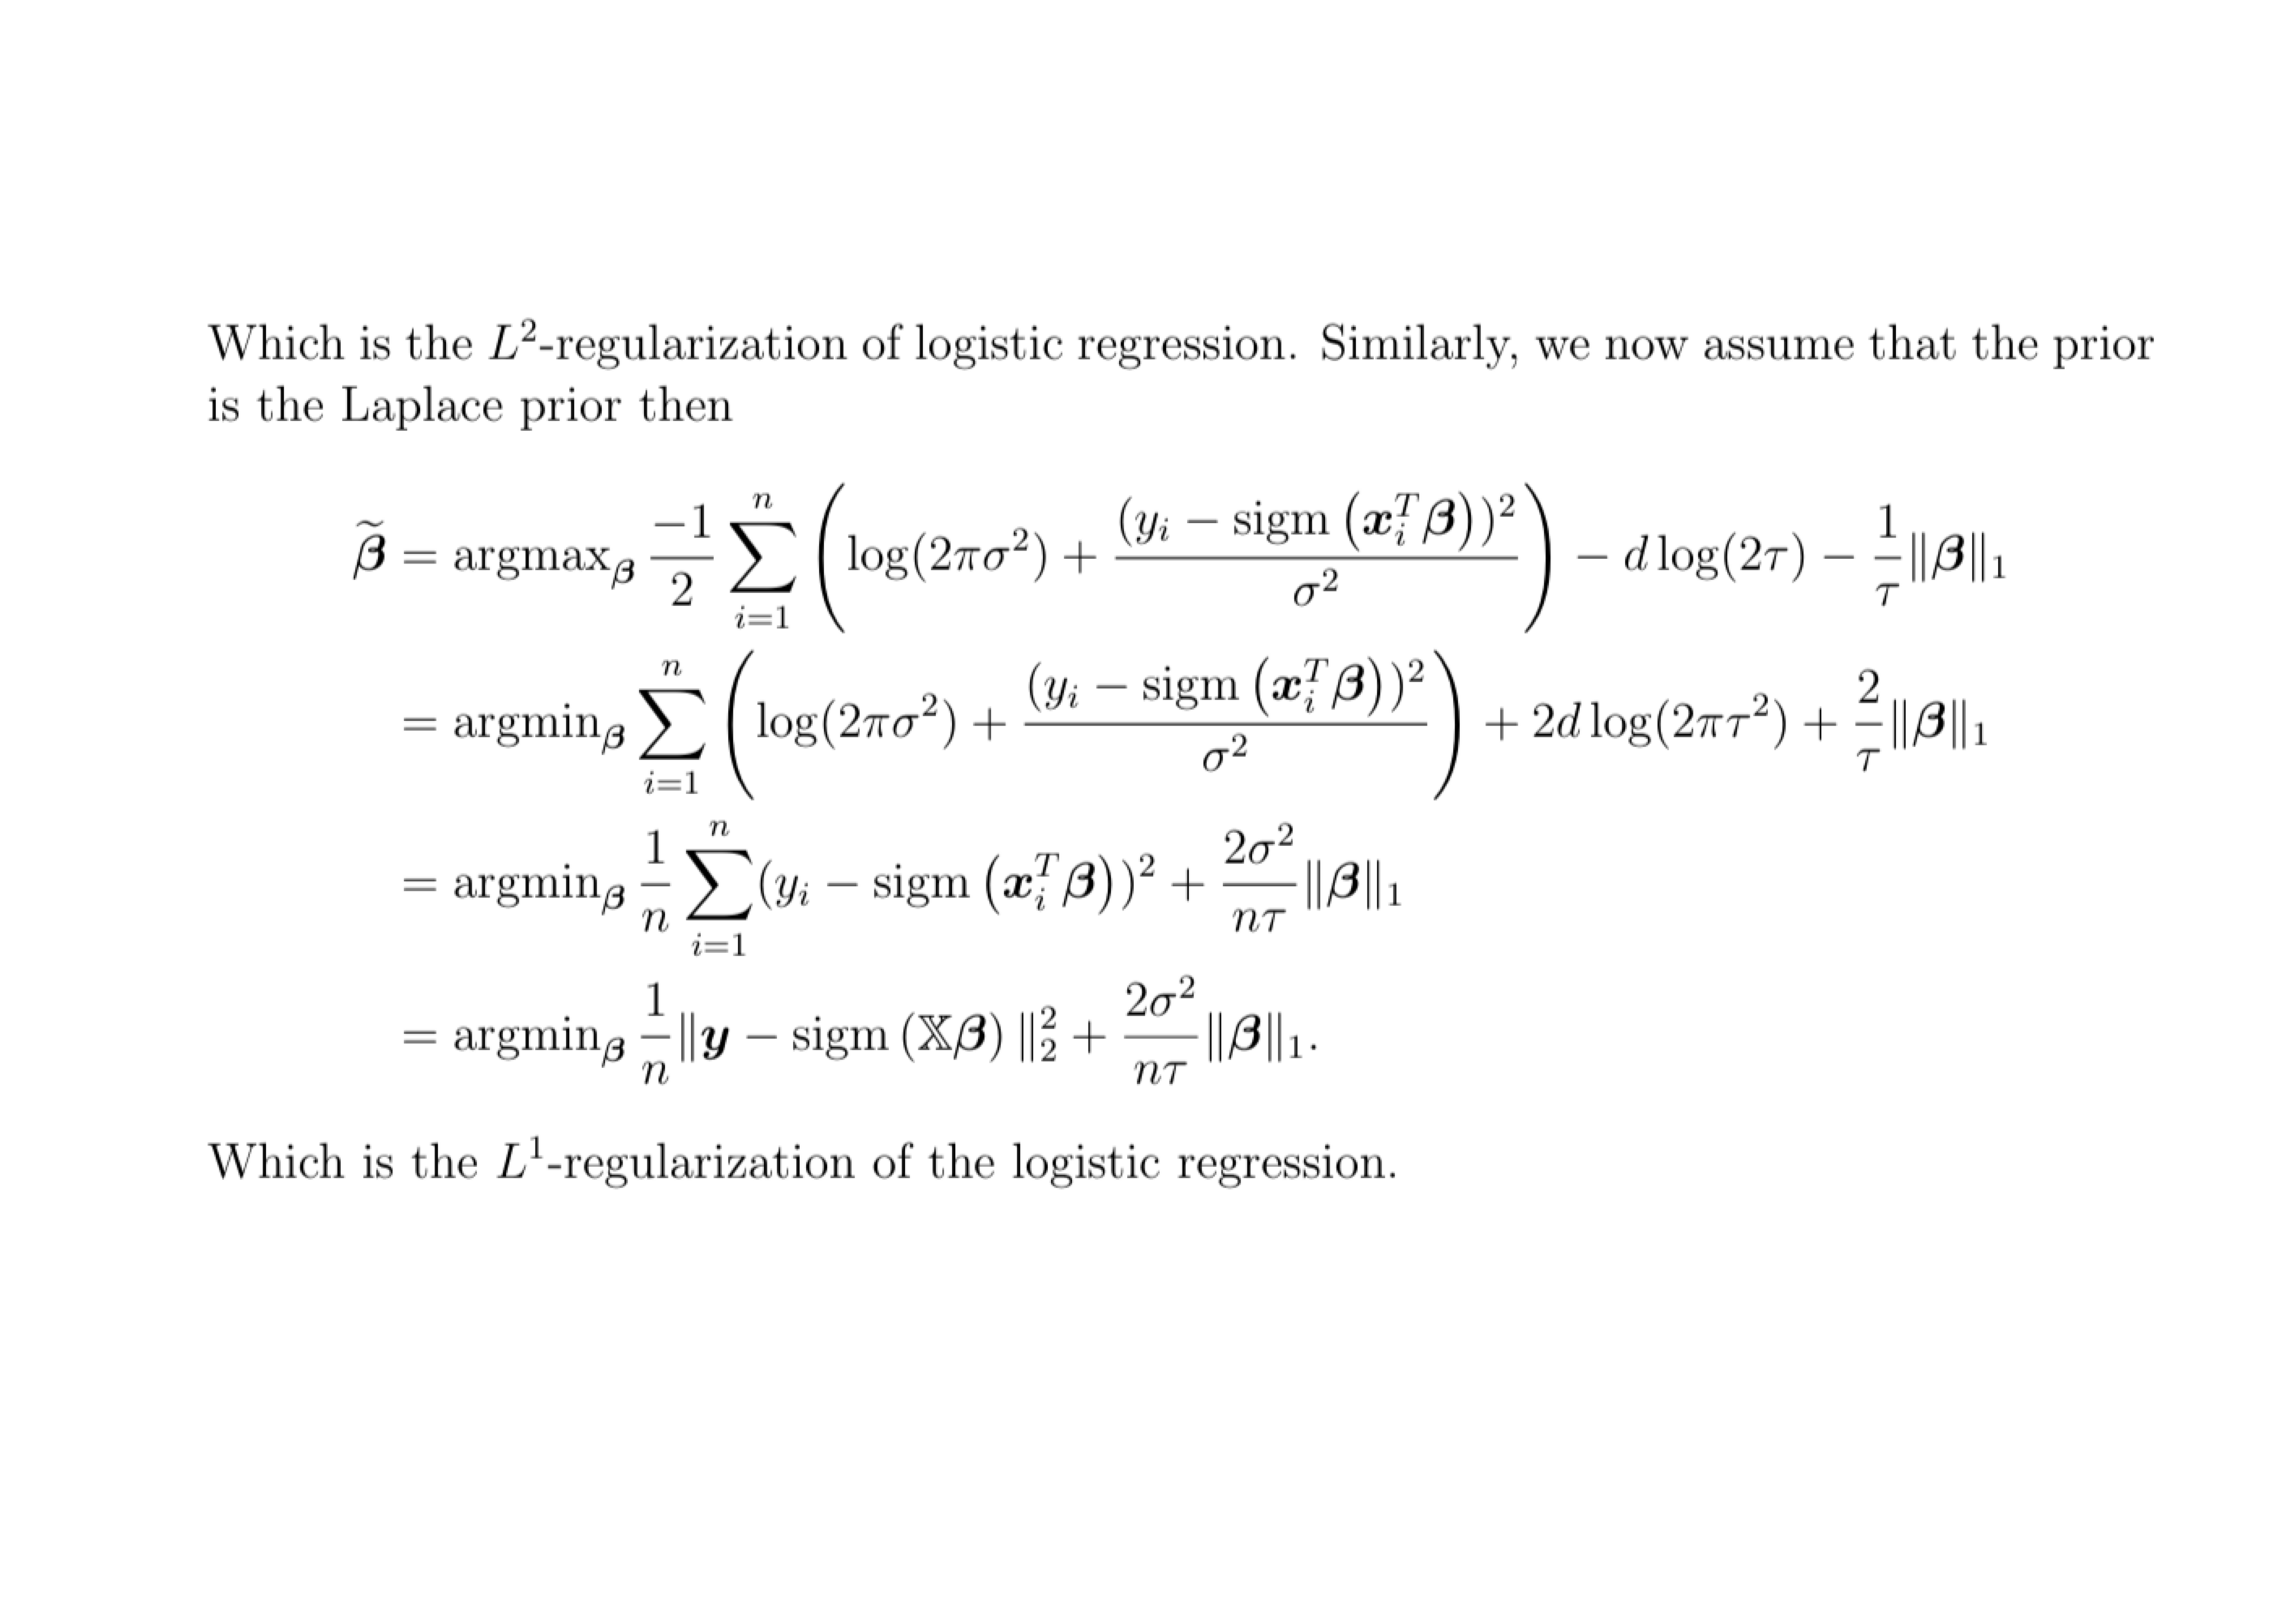

In [3]:
prob_31 = imread("5_31.png")
fig = plt.figure(figsize=(15,8))
fig.set_dpi(400)
ax = fig.add_subplot()
ax.imshow(prob_31)
ax.axis('off')
plt.show()

# Exercise 5.32

In [ ]:
#get the svd
def svd_ols(X,y):
    #svd solver for OLS

    # Get the svd
    u,s,vh = la.svd(X)
    
    # Fix the svd
    r = np.count_nonzero(s>0)
    s = s[:r]**-1
    uh = u.T[:r]
    v = vh[:r].T
    
    return v @ (np.diag(s) @ (uh@y))
def L2_reg(X, y, lam):
    #note here we are using the equation just above equation 5.30
    #find the shape
    n, d = X.shape
    #the Levenberg-Marqaudt modification
    LMM = np.sqrt(n*lam*np.eye(d))
    #stack the arrays together using 
    X = np.vstack((X, LMM))
    zero = np.zeros(X.shape[0] - y.size)     
    y = np.hstack((y, zero))

    return svd_ols(X, y)

# Exercise 5.33

In [ ]:
uploaded = files.upload()

Saving wages.csv to wages.csv


In [ ]:
def prob5_33():
    #read in data frame
    df = pd.read_csv('wages.csv')
    #get y value
    y = df['wage']
    #add constant value
    df['x0'] = 1
    #add female*married colume
    df['female*married'] = df['female']*df['married']
    #get subset of dataframe
    X = df[['female', 'educ','exper','tenure','married','female*married','numdep','nonwhite', 'x0']]
    #get lambda values to try
    lam_vals = np.logspace(start=-10, stop=5, num=16, base=10)

    #compare
    print('5.33(i) and (ii)')
    print('comparison of my method vs stats, linear model')
    for lam in lam_vals:
        my_beta = L2_reg(X, y, lam)
        stats_beta = OLS(y, X).fit_regularized(alpha=lam,L1_wt=0).params 
        print(np.allclose(my_beta, stats_beta))

    #compare
    print()
    print('5.33(iii)')
    print('We now compare with sklearn')
    for lam in lam_vals:
        my_beta = L2_reg(X, y, lam)
        sklearn_beta = Ridge(alpha=lam, normalize=True).fit(X, y).coef_
        print(np.allclose(my_beta, sklearn_beta))

    return

prob5_33()

5.33(i) and (ii)
comparison of my method vs stats, linear model
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

5.33(iii)
We now compare with sklearn
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


As we can see my method and statsmodels came up with the same beta values. Sklearn was different from boty statsmodels and me everywhere.

# Exercise 5.34
## Part 1

In [ ]:
def prob5_34_1():

    #for reference her is problem 5_26
    def prob5_26():
        df = pd.read_csv('wages.csv')
        y = df['wage']
        df['x0'] = 1
        df['female*married'] = df['female']*df['married']
        X = df[['female','educ','exper','tenure','married','female*married','numdep','nonwhite', 'x0']]
        results = sm.OLS(y, X).fit()
        #result of first model
        features = ['female','educ','exper','tenure','married','female*married','numdep','nonwhite']
        powerset = list(chain.from_iterable(combinations(features, r) for r in range(1,len(features)+1)))

        #get min_aic and best features
        min_aic = np.inf
        best_features = None
        for comb in powerset:
            current_feature = list(comb)
            current_feature.append('x0')
            X = df[current_feature]
            results = sm.OLS(y, X).fit()
            curr_aic = results.aic
            if curr_aic < min_aic:
                min_aic = curr_aic
                best_features = current_feature 
                best_results = results


        return min_aic, best_features, best_results

    min_aic, best_features, best_results = prob5_26()
    print('RESULTS FROM PROBLEM 26:')
    print(best_results.summary())
    print()
    print('Minimum AIC', min_aic)
    print('Best features to use', best_features)

    #read in data frame
    df = pd.read_csv('wages.csv')
    #get y value
    y = df['wage']
    #add constant value
    df['x0'] = 1
    #add female*married colume
    df['female*married'] = df['female']*df['married']
    #get subset of dataframe
    X = df[['female', 'educ','exper','tenure','married','female*married','numdep','nonwhite', 'x0']]
    #get lambda values to try
    lam_vals = np.logspace(start=-10, stop=5, num=16, base=10)

    print()
    for lam in lam_vals:
        print('lambda', lam)
        print('Nonzero Ceofficients:')
        print()
        stats_beta = OLS(y, X).fit_regularized(alpha=lam, L1_wt=1).params 
        mask = np.abs(stats_beta.values) > 0.001
        print(stats_beta[mask])
        print()


    return

prob5_34_1()

RESULTS FROM PROBLEM 26:
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     66.95
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           5.98e-54
Time:                        21:44:57   Log-Likelihood:                -1302.4
No. Observations:                 526   AIC:                             2617.
Df Residuals:                     520   BIC:                             2642.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
educ               

As the lambda values grow we get fewere and fewere nonzero coefficients. Beyond $\lambda = 1e3$ the coefficients are all zero. Around $\lambda= 0.1$ we find the closest to what the AIC returned.
## Part 2

In [ ]:
def prob5_34_2():
    #read in data frame
    df = pd.read_csv('wages.csv')
    #get y value
    y = df['wage']
    #add constant value
    df['x0'] = 1
    #add female*married colume
    df['female*married'] = df['female']*df['married']
    #get subset of dataframe
    X = df[['female', 'educ','exper','tenure','married','female*married','numdep','nonwhite']]
    #get lambda values to try
    lam_vals = np.logspace(start=-10, stop=5, num=16, base=10)

    for lam in lam_vals:
        stats_beta = OLS(y, X).fit_regularized(alpha=lam,L1_wt=1).params 
        sklearn_beta = Lasso(alpha=lam, normalize=True).fit(X, y).coef_
        print(np.allclose(stats_beta, sklearn_beta))

    return

prob5_34_2()

False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True


As we can see the values are the same as lambda gets larger, namerly when all the coefficients reutrned are zero. 

# Exercise 5.35
We will do the same thing as we did in exercise 23 on homework 5.4. I.e. finding someones work types based on their health data. 

In [ ]:
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


# Part 1, best model with OLS

In [ ]:
def get_data():
    #get dataframe and corresponding values
    df = pd.read_csv('healthcare-dataset-stroke-data.csv')
    df.dropna(inplace=True) 
    df = shuffle(df)
    df = pd.get_dummies(df, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'stroke',
                                     'Residence_type', 'smoking_status'], drop_first=True)
    y = df['work_type']
    unique = pd.unique(y)
    for i, work in enumerate(unique):
        curr_mask = y == work
        y[curr_mask] = i
    X = df.drop(['work_type', 'id'], axis=1)

    return X, y

def prob5_35_1():
    #run cross validation on OLS

    X_full, y = get_data()
    regr_full = LinearRegression()
    cross_validation_full = cross_val_score(regr_full, X_full, y, cv=7)
    print('Score and Model using Cross validation for OLS:')
    print('Score:', np.mean(cross_validation_full)) 
    print('Best Model using Cross validation for OLS')
    print(regr_full.fit(X_full, y).coef_)
    return


prob5_35_1()

Score and Model using Cross validation for OLS:
Score: 0.022422612837245053
Best Model using Cross validation for OLS
[-9.11943922e-03 -1.11136401e-04  9.66922357e-03  1.03287284e-03
  7.42866975e-01 -9.47833554e-02  5.00143655e-02 -9.32992721e-04
  1.33439213e-01 -3.02869513e-02  8.04491750e-02  1.40238078e-01
  1.76328483e-01]


## Part 2

In [ ]:
def prob5_35_2():
    X_full, y = get_data()
    lam_vals = np.logspace(start=-12, stop=5, num=18, base=10)
    best_score = np.NINF
    for lam in lam_vals:
        ridge = Ridge(alpha=lam, normalize=True)
        cross_validation = cross_val_score(ridge, X_full, y, cv=7)
        curr_score = np.mean(cross_validation)
        if curr_score > best_score:
            best_score = curr_score
            best_lambda = lam
            best_coefs = ridge.fit(X_full, y).coef_

    print('Score and Model using Cross validation for Ridge:')
    print('Score:', best_score) 
    print('Lambda:', best_lambda) 
    print('Best Model using Cross validation for Ridge:')
    print(best_coefs)
    return
prob5_35_2()

Score and Model using Cross validation for Ridge:
Score: 0.06450582319481642
Lambda: 0.01
Best Model using Cross validation for Ridge:
[-4.19740403e-03  6.11244255e-04 -1.72464885e-02  4.87300936e-02
 -1.01154151e+00  1.25077446e-01  2.27839732e-02 -9.58018986e-02
 -1.85722962e-02  4.36633342e-02 -2.31174689e-01 -2.91150910e-01
 -3.63515918e-01]


## Part 3

In [ ]:
def prob5_35_3():
    X_full, y = get_data()
    lam_vals = np.logspace(start=-12, stop=5, num=18, base=10)
    best_score = np.NINF
    for lam in lam_vals:
        lasso = Lasso(alpha=lam, normalize=True)
        cross_validation = cross_val_score(lasso, X_full, y, cv=7)
        curr_score = np.mean(cross_validation)
        if curr_score > best_score:
            best_score = curr_score
            best_lambda = lam
            best_coefs = lasso.fit(X_full, y).coef_

    print('Score and Model using Cross validation for Lasso:')
    print('Score:', best_score) 
    print('Lambda:', best_lambda) 
    print('Best Model using Cross validation for Lasso:')
    print(best_coefs)
    return
prob5_35_3()


Score and Model using Cross validation for Lasso:
Score: 0.04500661106423003
Lambda: 1e-05
Best Model using Cross validation for Lasso:
[ 3.84899385e-03  4.35100955e-04 -1.35550423e-02  1.43485347e-02
 -4.55216573e-01  1.66273798e-01  7.54266778e-02 -2.35141493e-01
 -0.00000000e+00  1.91231108e-02 -1.57808857e-01 -2.43238893e-01
 -3.14777729e-01]


## Part 4

In [ ]:
def prob5_35_4():
    X_full, y = get_data()
    lam_vals = np.logspace(start=-12, stop=5, num=18, base=10)
    best_score = np.NINF
    for lam in lam_vals:
        enet = ElasticNet(alpha=lam, normalize=True)
        cross_validation = cross_val_score(enet, X_full, y, cv=7)
        curr_score = np.mean(cross_validation)
        if curr_score > best_score:
            best_score = curr_score
            best_lambda = lam
            best_coefs = enet.fit(X_full, y).coef_

    print('Score and Model using Cross validation for Elastic Net:')
    print('Score:', best_score) 
    print('Lambda:', best_lambda) 
    print('Best Model using Cross validation for Elastic Net:')
    print(best_coefs)
    return
prob5_35_4()

Score and Model using Cross validation for Elastic Net:
Score: 0.04593135356116045
Lambda: 1e-05
Best Model using Cross validation for Elastic Net:
[ 3.49057896e-03  4.35963996e-04 -1.33553314e-02  1.51960174e-02
 -4.69503722e-01  1.63784661e-01  7.95694292e-02 -2.24339329e-01
  1.13716658e-03  1.93594528e-02 -1.44469658e-01 -2.30341447e-01
 -3.00278989e-01]
